In [1]:
cd ../

d:\Personal\project_temp\ReliSource\1st_phase\ReliSource


In [2]:
import pandas as pd

train_data =  pd.read_csv('data/cleaned_train_iffat.csv')
test_data =  pd.read_csv('data/test.csv')
train_data

,UID,col_4,y,col_0_numerical,col_1_numerical,col_2_numerical,col_3_numerical,col_5_numerical,col_6_numerical
0,0,100,237000,0,0,2,1,1,2
1,1,100,86193,1,0,11,4,4,2
2,2,0,169200,0,0,18,0,0,2
3,3,100,58000,2,0,11,1,1,2
4,4,0,235000,0,0,67,1,1,2
...,...,...,...,...,...,...,...,...,...
2623,2623,0,102100,1,0,2,1,1,2
2624,2624,0,129300,0,0,8,1,1,2
2625,2625,100,275300,0,0,7,1,1,2
2626,2626,100,150000,0,0,11,1,1,2


In [3]:
train_data

,UID,col_4,y,col_0_numerical,col_1_numerical,col_2_numerical,col_3_numerical,col_5_numerical,col_6_numerical
0,0,100,237000,0,0,2,1,1,2
1,1,100,86193,1,0,11,4,4,2
2,2,0,169200,0,0,18,0,0,2
3,3,100,58000,2,0,11,1,1,2
4,4,0,235000,0,0,67,1,1,2
...,...,...,...,...,...,...,...,...,...
2623,2623,0,102100,1,0,2,1,1,2
2624,2624,0,129300,0,0,8,1,1,2
2625,2625,100,275300,0,0,7,1,1,2
2626,2626,100,150000,0,0,11,1,1,2


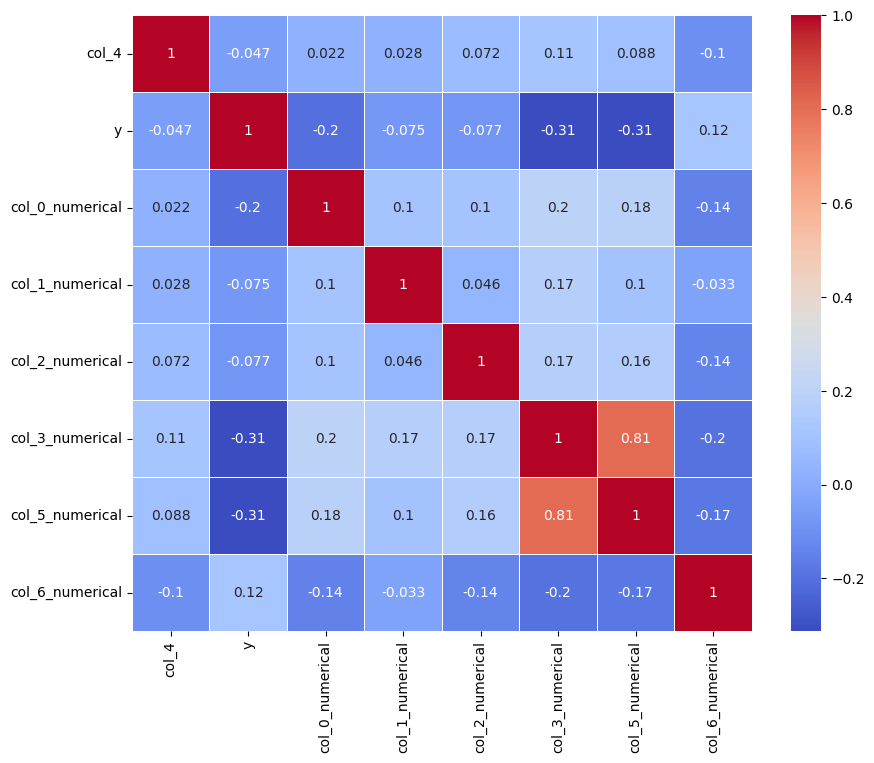

Filtered Dataset:
           y  col_3_numerical  col_5_numerical
0     237000                1                1
1      86193                4                4
2     169200                0                0
3      58000                1                1
4     235000                1                1
...      ...              ...              ...
2623  102100                1                1
2624  129300                1                1
2625  275300                1                1
2626  150000                1                1
2627  191475                1                1

[2628 rows x 3 columns]


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = train_data.drop(columns=["UID"])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Define your correlation threshold (e.g., 0.3)
correlation_threshold = 0.3

# Identify columns to remove based on the correlation threshold
columns_to_remove = []
for column in correlation_matrix.columns:
    if column != 'y' and abs(correlation_matrix['y'][column]) < correlation_threshold:
        columns_to_remove.append(column)

# Remove the columns from the dataset
df_filtered = df.drop(columns=columns_to_remove)

# Display the heatmap and the filtered dataset
plt.show()
print("Filtered Dataset:")
print(df_filtered)


In [9]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('your_dataset.csv')
data = train_data

# Separate the features (X) and target variable (y)
X = data.drop(columns=['UID', 'y'])  # Exclude UID and y columns
y = data['y']

# Create your model instance (e.g., Linear Regression)
model = LinearRegression()

# Create the RFE model and specify the number of features to select
n_features_to_select = 5  # Replace with the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE to your data
rfe.fit(X, y)

# Get the selected features
selected_features = rfe.support_

# Get the feature ranking
feature_ranking = rfe.ranking_

# Create a DataFrame with columns and their corresponding rankings
feature_ranking_df = pd.DataFrame({'Column': X.columns, 'Feature Ranking': feature_ranking})

# Sort the DataFrame by feature ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Feature Ranking')

# Print the DataFrame
print(feature_ranking_df)

            Column  Feature Ranking
1  col_0_numerical                1
2  col_1_numerical                1
4  col_3_numerical                1
5  col_5_numerical                1
6  col_6_numerical                1
3  col_2_numerical                2
0            col_4                3
